# <img src="./assets/course-icon.png" style="height:50px;display:inline"> EE 046211 - Technion - Deep Learning
---

#### Tal Daniel

## Tutorial 01 - Machine Learning Basics Refresher

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Supervised Vs. Unsupervised Learning](#-Supervised-Vs.-Unsupervised-Learning)
* [Evaluation: Train-Test Split](#-Evaluation:-Train-Test-Split)
    * [Train-Validation-Test Split](#-Train-Validation-Test-Split)
* [The Bias-Variance Tradeoff](#-The-Bias-Variance-Tradeoff)
* [Feature Scaling: Normalization and Standartization](#-Feature-Scaling:-Normalization-and-Standartization)
    * [Normalization - MinMax Scaling](#Normalization---MinMax-Scaling)
    * [Standartization](#Standartization)
* [Linear Regression](#-Linear-Regression)
    * [Linear Regression Cost Function](#-Linear-Regression-Cost-Function)
    * [Closed-Form Least-Squares Solution](#-Closed-Form-Least-Squares-Solution)
    * [Gradient Descent Solution](#-Gradient-Descent-Solution)
* [Regularization](#-Regularization)
    * [Ridge Regression](#-Ridge-Regression)
    * [LASSO Regression](#-LASSO-Regression)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Ridge, Lasso
%matplotlib notebook

## <img src="https://img.icons8.com/cute-clipart/64/000000/visible.png" style="height:50px;display:inline"> Supervised Vs. Unsupervised Learning
---
* We roughly divide ML algorithms to 2.5 groups:
    * **Supervised Learning** - along with our data (features), we are also given **labels** which match the features. For example, a datasets that containg images of cats and dogs, and each image is accompanied by a label "dog" or "cat".
        * Typical tasks: classification, regression.
    * **Unsupervised Learning** - we are only given features from some data distribution, and try to learn only from them, without any known labels. For example, a dataset that contains samples from a mixture of Gaussians, and we try to learn the parameters of the disribution, or discover patterns in unlabeled medical data using clustering.
        * Typical tasks: pattern discovery, clustering, dimensionality reduction.
    * **Semi-Supervised Learning** - we are given features, but also very few known labels. It is usually the case that we can't employ supervised learning algorithms, due to the risk of overfitting. For example, a dataset containing samples of regular data, and we are also given very few labels of anomalies in order to build better outlier detectors.
    
* Note: there is also *Reinforcement Learning*, but we will no address it in this course.

<img src='./assets/unsuper_vs_super.jpg' style="height:350px">

* <a href="https://medium.com/@recrosoft.io/supervised-vs-unsupervised-learning-key-differences-cdd46206cdcb">Image Source</a>

<img src="./assets/cifar_semisuper.png" style="height:300px">

* <a href="https://medium.com/analytics-vidhya/fixmatch-semi-supervised-learning-method-that-can-be-learned-even-if-there-is-only-one-labeled-e7e1b37e8935">Image Source</a>

## <img src="https://img.icons8.com/clouds/100/000000/combo-chart.png" style="height:50px;display:inline"> Evaluation: Train-Test Split
---

It is important to evaluate the classifier generalization performance in order to:
* Determine whether to employ/distribute the classifier
* Compare classifiers (even compare the same type of classifiers, but with different parameters)
* Optimize the classifier to perform better on unseen data

* **Train-Test Separation** - The *naive* approach is seprating the data into train set and test set, that is, taking a portion of the data for training the model (usually about 80% of the dataset) and save another portion, that the model **has not seen** in order to test the model's performance. This is called the test set (usually about 20% of the dataset).
    * **Shuffling** - Shuffling the data serves the purpose of reducing variance and making sure that models remain general and overfit less. The popular case where shuffling is very important is when the data is sorted by their class/target. By shuffling we add randomness that assures that the training/test/validation sets are representative of the overall distribution of the data.

* Note: Scikit-learn has a function we can use called `train_test_split` that makes it easy for us to split our dataset into training and testing data.

In [2]:
# let's load the cancer dataset, shuffle it and  speratre into train and test set
dataset = pd.read_csv('./datasets/cancer_dataset.csv')
# print the number of rows in the data set
number_of_rows = len(dataset)
print("total samples: {}".format(number_of_rows))
total_positive_samples = np.sum(dataset['diagnosis'].values == 'M')
print("total positive sampels (M): {}, total negative samples (B): {}".format(
    total_positive_samples, number_of_rows - total_positive_samples))
num_train = int(0.8 * number_of_rows)
dataset.sample(10)

total samples: 569
total positive sampels (M): 212, total negative samples (B): 357


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
313,893988,B,11.540,10.72,73.73,409.1,0.08597,0.05969,0.013670,0.008907,...,12.87,81.23,467.8,0.1092,0.16260,0.08324,0.04715,0.3390,0.07434,NaN
32,85382601,M,17.020,23.98,112.80,899.3,0.11970,0.14960,0.241700,0.120300,...,32.09,136.10,1344.0,0.1634,0.35590,0.55880,0.18470,0.3530,0.08482,NaN
277,8911670,M,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,...,24.30,129.00,1236.0,0.1243,0.11600,0.22100,0.12940,0.2567,0.05737,NaN
309,893548,B,13.050,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,...,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580,NaN
478,911685,B,11.490,14.59,73.99,404.9,0.10460,0.08228,0.053080,0.019690,...,21.90,82.04,467.6,0.1352,0.20100,0.25960,0.07431,0.2941,0.09180,NaN
525,91805,B,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,...,18.45,63.30,275.6,0.1641,0.22350,0.17540,0.08512,0.2983,0.10490,NaN
565,926682,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,...,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637,NaN
180,873592,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.287100,0.187800,...,32.85,220.80,3216.0,0.1472,0.40340,0.53400,0.26880,0.2856,0.08082,NaN
345,898677,B,10.260,14.71,66.20,321.6,0.09882,0.09159,0.035810,0.020370,...,19.48,70.89,357.1,0.1360,0.16360,0.07162,0.04074,0.2434,0.08488,NaN
168,8712766,M,17.470,24.68,116.10,984.6,0.10490,0.16030,0.215900,0.104300,...,32.33,155.30,1660.0,0.1376,0.38300,0.48900,0.17210,0.2160,0.09300,NaN


In [3]:
# split to train-test
x = dataset[['radius_mean', 'texture_mean']].values
y = dataset['diagnosis'].values == 'M'  # 1 for Malignat, 0 for Benign
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("train size: {}, test size: {}".format(len(X_train), len(X_test)))

train size: 455, test size: 114


* The accuracy/error estimates on the *training* data **are not** good indicators of performance on future data!
* The reason: new data will probably not be exactly the same as the training data.
* The accuracy/error estimates on the training data measure the degree of classifier's **underfitting** or **overfitting**.
* A typical learning curve usually looks like this: <img src="./assets/overfitting.png" style="height:200px">

<a href="http://mlwiki.org/index.php/Overfitting">Image Source</a>

### <img src="https://img.icons8.com/bubbles/100/000000/more.png" style="height:50px;display:inline"> Train-Validation-Test Split
---
* Let's say you have a dataset which you separated into *train* set and *test* set. 
* You want to train a classifier that has hyper-parameters (parameters that are not trained, but are user-selected before the training) that you have to tune. 
    * For example, in the classifier "K-Nearest Neighbours" you need to choose $K$, the number of nearest neighbours needed to perform classification, or in "Stochastic Gradient Descent", you need to choose the learning rate (which is a continuous value, like 0.0001). 

* Would it be fair to train the classifier on the train set for each hyper-parameter and then test it on the test set and finally selecting the best hyper-parameters based on the performance on the test set? **NO!**
    * It is like taking an open-material exam, but instead of bringing all of the material, you bring only the material relevant to the questions asked in the exam. It is sort of cheating.

That is why we seperate into 3 sets:

* **Train Set** - from which the model learns
* **Validation Set** - on which the hyper-parameters are tuned
* **Test Set** - untouched samples on which you test the generalization ability of the model. This set has **never** been seen by the model.

<img src="./assets/validation.jpg" style="height:300px">

### Cross-Validation
---
* Separating to validation and test sets is not very data efficient as we now allocate less data for training.
* **Cross-validation** is randomly splitting the data into $k$ groups. One of the groups is used as the test set and the rest are used as the training set. 
* The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set. This method is also called **"K-Fold Cross Validation"**.
* Scikit-Learn: `cross_val_score` - takes in a classifier, training data, $k$ (number of folds) and the scoring technique ("accuracy" for example). <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">Read the Doc Here</a>

### <img src="https://img.icons8.com/color/96/000000/wrestling.png" style="height:50px;display:inline"> The Bias-Variance Tradeoff
---
An important theoretical result of statistics and **classic** ML is the fact the **the model generalization error** can be expressed as a sum of 3 different errors: **bias, variance and irreducible error**.
* Given a **true** (but unknown) function $F(x)$ with noise $F(x) = f + \epsilon$, we seek to estimate it based on $n$ samples from a set $\mathcal{D}$. We denote the **regression function** as $g(x; \mathcal{D})$.
* The error of the regression model is given by: $$ MSE = \mathbb{E}_{\mathcal{D}} \big[(F(x) -  g(x; \mathcal{D}) )^2 \big] $$
* The total error can be decomposed into 3 terms: $$ E[(F - g )^2] = E[(f + \epsilon -g)^2] =  E[(f + \epsilon -g +E[g] - E[g])^2] = ... = (f - E[g])^2 +E[\epsilon^2] +E\big[(E[g] - g)^2\big]$$ $$ = Bias[g]^2 +\sigma^2 +Var[g]$$


* <a href="https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff">Full derivation on Wikipedia </a>

* **Bias** - $(f - E[g])$: It is the difference between the expected value and the true value. This part of the generalization error is due to wrong assumptions (e.g. assuming the data is linear when it is actually quadratic). A *high-bias* model is most likely to **underfit** the training data.
* **Variance** - $E\big[(E[g] - g)^2\big]$: This part is due to the model's sensitivity to small variations in the training data. A model with many degrees of freedom (such as high-degree polynomial model) is likely to have **high variance**, and thus tend to **overfit** the training data. Low varaince - the estimate of $F$ does not change much as the training set varies.
* **Irreducible Error** - $\sigma^2$: This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, detect and remove outliers...).

<img src="./assets/bias_var.jpg" style="height:300px">

* Note: this is the classical curve, and as you will see later in the course, there is actually something special that happens in deep learning, and it is different than what you see in the curve above.

<a href="http://scott.fortmann-roe.com/docs/BiasVariance.html">Image Source</a>

## <img src="https://img.icons8.com/clouds/100/000000/scales.png" style="height:50px;display:inline"> Feature Scaling: Normalization and Standartization
---
* Feature scaling is a fudemental part of the data pre-processing stage.
* It can improve the performance of some machine learning algorithms, but may also harm others.
* It is especially important for **Gradient Descent-based** algoirthms such as linear regression, logistic regression, neural networks, and etc.
* The range of feature also significantly affects **distance-based** algorithms such as KNN, SVM and K-Means.

* Let's take at the general formulation of Gradient Descent for linear regression: $$ \theta_j^{(t+1)} \leftarrow \theta_j^{(t)} -\alpha \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}, $$
where $x, \theta \in \mathcal{R}^m$ and $h_{\theta}:\mathcal{R}^m \to \mathcal{R}.$
* The presence of feature value X in the formula will affect the step size of the gradient descent!
    * The difference in ranges of features will cause different step sizes for each feature. 
* To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.
* **Having features on a similar scale can usually help the gradient descent converge more quickly towards the minima.**

### Normalization - MinMax Scaling
---
* Normalization is a scaling technique in which values are shifted and rescaled so that they end up **ranging between 0 and 1**. 
    * It is also known as Min-Max scaling. $$ X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} $$
    * $X_{max}$ and $X_{min}$ are the maximum and the minimum values of the feature respectively.
* Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. 
* This can be useful in algorithms that do not assume any distribution of the data like K-NN and Neural Networks.

In [4]:
# fit scaler on training data (not on test data!)
scaler = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = scaler.transform(X_train)

# transform testing data
X_test_norm = scaler.transform(X_test)

### Standartization
---
* Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. 
* This means that the mean of the deatures becomes zero and the resultant distribution has a unit standard deviation. $$ X_{scaled} = \frac{X - \mu}{\sigma} $$
    * $\mu$ is the (empirical) mean of the feature values and $\sigma$ is the (empirical) standard deviation of the feature values. 
    * Note that in this case, the values are not restricted to a particular range.
* Standardization can be helpful in cases where the data follows a Gaussian distribution. 
* However, this does not have to be necessarily true. 
* Unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

<img src="./assets/z_score.gif" style="height:250px">

* <a href="https://kharshit.github.io/blog/2018/03/23/scaling-vs-normalization">Image Source</a>

In [5]:
# fit scaler on training data (not on test data!)
scaler = StandardScaler().fit(X_train)

# transform training data
X_train_norm = scaler.transform(X_train)

# transform testing data
X_test_norm = scaler.transform(X_test)

### Feature Scaling In Practice
---
* At the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. 
* You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.
* It is a good practice to fit the scaler on the training data and then use it to transform the testing data. 
* This would avoid any data leakage during the model testing process. 
* Scaling of target values (or labels) is usually not required.

## <img src="https://img.icons8.com/dusk/64/000000/line.png" style="height:50px;display:inline"> Linear Regression
---
A linear model makes a prediction by computing a weighted sum of the input features, plus a constant called the *bias term* (also called *intercept* sometimes).

We denote:
* $\hat{y}$ - the predicted value
* $n$ - number of features
* $x_i$ is the $i^{th}$ feature value
* $\theta_j$ is the $j^{th}$ model parameter, where $\theta_0$ is the bias weight ($\theta_0 \cdot 1$)

The *Linear Regression* model prediction: $$ \hat{y} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n $$
In *vector* form: $$ \hat{y}=h_{\theta} (x) =\theta^T \cdot x $$

* In fact, we can look at the linear regression problem as one application of a *single neuron* as we will discuss in the next lesson.

### <img src="https://img.icons8.com/dusk/64/000000/us-dollar.png" style="height:50px;display:inline"> Linear Regression Cost Function 
---
How do we train a linear regression model?

* Training a model means tuning its parameters so that the model best fits to the training data (train set)
* The most common performance measure on a regression model is the Root Mean Square Error (RMSE), thus, we need to find the value of $\theta$ that minimzes the RMSE. In practice, it is simpler to minimize the Mean Square Error - **MSE** (the same values that minimize the RMSE, also minimize the MSE).
* The MSE Cost Function: $$ MSE(X, h_{\theta}) = \frac{1}{m}\sum_{i=1}^m (\theta^T \cdot x^{(i)} - y^{(i)})^2 $$
    * Pay attention to notations: $m$ is the number of samples, where $n$ is the number of features. That is, each sample has $n$ components.

### <img src="https://img.icons8.com/doodle/96/000000/close-sign.png" style="height:50px;display:inline"> Closed-Form Least-Squares Solution
---
To find the value of $\theta$ that minimizes the cost function, there is a *closed-form solution* - a mathemtical equation that gives the result directly. It is also called the **Normal Equation**. We will now derive it.

* We wish to find a solution for $\hat{y} = X \theta$
* The parameters $\theta$ are obtained by minimzing the *sum of squared* errors or residuals (SSE): $$ SSE(\theta) = \sum_{i=1}^n (\theta^T x_i - y_i)^2 = ||X \theta -y ||_2^2 = (X\theta -y)^T(X\theta - y) = \theta^TX^TX\theta -\theta^TX^Ty - y^TX\theta +y^Ty$$
* Minimizing w.r.t to $\theta$: $$\nabla_{\theta}SSE(\theta) = 2X^TX\theta - 2X^Ty = 0 \rightarrow \theta^{*} = (X^TX)^{-1}X^Ty $$
* The matrix $(X^TX)^{-1}X^T$ is the *Pseudo Inverse* of $X$

### <img src="https://img.icons8.com/dusk/64/000000/double-down.png" style="height:50px;display:inline"> Gradient Descent Solution
---
* The general idea is to tweak parameters **iteratively** to minimize a cost function.
* It measures the local gradient of the error function with regards to the parameter vector ($\theta$ or $w$), and it goes down in the direction of the descending gradient. Once the gradient is zero - the minimum is reached (=convergence).

* **Learning Rate** hyperparameter - it is the size of step to be taken in each iteration.
    * Too *small* $\rightarrow$ the algorithm will have to go through many iterations to converge, which will take a long time
    * Too *high* $\rightarrow$ might make the algorithm diverge as it may miss the minimum
    * <img src="./assets/lr.png" style="height:250px"> <a href="https://www.jeremyjordan.me/nn-learning-rate/">Image Source</a>

#### <img src="https://img.icons8.com/dusk/64/000000/waypoint-map.png" style="height:30px;display:inline">Stochastic Gradient Descent (Mini-Batch Gradient Descent)
---
* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter $w$
    * **While** stopping criterion not met **do**
        * Sample a minibatch of $m$ examples from the training set ($m=1$ for SGD)
        * Set $\tilde{X} = [x_1,...,x_m] $ with corresponding targets $\tilde{Y} = [y_1,...,y_m]$
        * Compute gradient: $g \leftarrow 2\tilde{X}^T\tilde{X}w - 2\tilde{X}^T \tilde{Y}$
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**

<img src="./assets/gd.gif">

In [6]:
# helper functions

def plot_3d_lls(x, y, z, lls_sol, title=""):
    # plot
    %matplotlib notebook
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, label='Y')
    ax.scatter(x, y, lls_sol, label='Xw')
    ax.legend()
    ax.set_xlabel('Radius Mean')
    ax.set_ylabel('Area Mean')
    ax.set_zlabel('Perimeter Mean')
    ax.set_title(title)
    
    
def batch_generator(x, y, batch_size, shuffle=True):
    """
    This function generates batches for a given dataset x.
    """
    N, L = x.shape
    num_batches = N // batch_size
    batch_x = []
    batch_y = []
    if shuffle:
        # shuffle
        rand_gen = np.random.RandomState(0)
        shuffled_indices = rand_gen.permutation(np.arange(N))
        x = x[shuffled_indices, :]
        y = y[shuffled_indices, :]
    for i in range(N):
        batch_x.append(x[i, :])
        batch_y.append(y[i, :])
        if len(batch_x) == batch_size:
            yield np.array(batch_x).reshape(batch_size, L), np.array(batch_y).reshape(batch_size, 1)
            batch_x = []
            batch_y = []
    if batch_x:
        yield np.array(batch_x).reshape(-1, L), np.array(batch_y).reshape(-1, 1)

In [7]:
# split to train-test
x = dataset[['radius_mean', 'area_mean']].values
y = dataset[['perimeter_mean']].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
N = len(X_train)
print("train size: {}, test size: {}".format(len(X_train), len(X_test)))

train size: 455, test size: 114


In [8]:
# multivaraite mini-batch gradient descent
# scaling (done maually, but you can also use sklearn)
X_train = (X_train - X_train.mean(axis=0, keepdims=True)) / X_train.std(axis=0, keepdims=True)
y_train = (y_train - y_train.mean(axis=0, keepdims=True)) / y_train.std(axis=0, keepdims=True)
batch_size = 16
num_batches = N // batch_size
print("total batches:", num_batches)

total batches: 28


In [9]:
num_epochs = 10
alpha_k = 0.001
batch_gen = batch_generator(X_train, y_train, batch_size, shuffle=True)
# initialize w
w = np.zeros((2, 1))
for i in range(num_epochs):
    for batch_i, batch in enumerate(batch_gen):
        batch_x, batch_y = batch
        if batch_i % 50 == 0:
            print("iter:", i, "batch:", batch_i, " w = ")
            print(w)
        gradient = 2 * batch_x.T @ batch_x @ w - 2 * batch_x.T @ batch_y
        w = w - alpha_k * gradient
    batch_gen = batch_generator(X_train, y_train, batch_size, shuffle=True)

lls_sol = X_train @ w

iter: 0 batch: 0  w = 
[[0.]
 [0.]]
iter: 1 batch: 0  w = 
[[0.42566046]
 [0.42652946]]
iter: 2 batch: 0  w = 
[[0.49438843]
 [0.4874651 ]]
iter: 3 batch: 0  w = 
[[0.50874553]
 [0.49279593]]
iter: 4 batch: 0  w = 
[[0.5147853 ]
 [0.48970514]]
iter: 5 batch: 0  w = 
[[0.51951802]
 [0.48537405]]
iter: 6 batch: 0  w = 
[[0.52401117]
 [0.48089531]]
iter: 7 batch: 0  w = 
[[0.52842767]
 [0.47643479]]
iter: 8 batch: 0  w = 
[[0.53279273]
 [0.47201729]]
iter: 9 batch: 0  w = 
[[0.53711063]
 [0.46764616]]


<IPython.core.display.Javascript object>


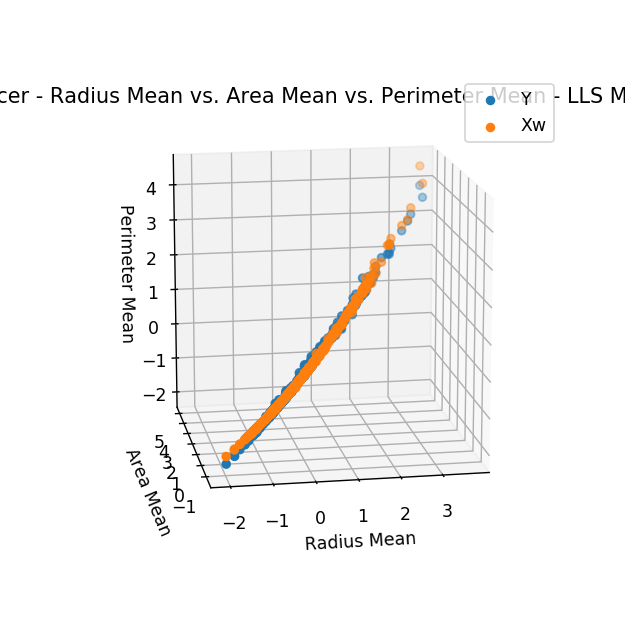

w:
[[0.54138243]
 [0.4633215 ]]


In [11]:
# plot
plot_3d_lls(X_train[:,0], X_train[:, 1], y_train, lls_sol, 
            "Breast Cancer - Radius Mean vs. Area Mean vs. Perimeter Mean - LLS Mini-Batch GD")
print("w:")
print(w)

## <img src="https://img.icons8.com/color/96/000000/infinity-large.png" style="height:50px;display:inline"> Regularization
---
* A good way to **reduce** overfitting is to regularize (i.e. constrain) the model. 
* The fewer degrees of freedom it has, the harder it will be to overfit the data. 
    * For example, in *Polynomial Fitting*, a simple regularization would be to reduce the number of polynomial degrees. 
* We will look at **Ridge & Lasso Regressions**.

### <img src="https://img.icons8.com/dusk/64/000000/2.png" style="height:50px;display:inline"> Ridge Regression
---
* *Ridge Regression* (also called *Tikhonov Regularization*) is a regularized version of Linear Regression where the *regularization term* is equal to $\lambda \sum_{i=1}^n \theta_i^2$ ($l_2$) and is added to to the cost function.
* This form of cost function **forces** the algorithm not only to fit the data but also **keep the model weights as small as possible**.
* The regularization term is only added during **training**.
* The **hyperparameter** $\lambda$ controls how much to regularize the model.
    * **The Shrinking Effect**
        * When $\lambda \to 0$ we resort back to the (unconstrained) Least Squares solution.
        * As $\lambda$ increases, then all the weights end up very close to zero and the result is a **flat line** going through the data's mean.

* **Ridge Regression Cost Function**: $$ J(\theta) = MSE(\theta) +\lambda \sum_i\theta_i^2 $$
* **In Vector Form**: $$ J(\theta) = ||X \theta - y ||_2^2 +\lambda ||\theta ||_2^2 = (X \theta - y)^T(X \theta - y) + \lambda\theta^T\theta$$
* **The Gradient**: $$\nabla_{\theta}J(\theta) = 2(X^TX\theta - X^Ty) + 2\lambda\theta $$
* **The Closed-Form Solution**: $$ \theta^{*} = (X^TX +\lambda I)^{-1}X^Ty $$

In [18]:
# ridge regression
ridge_reg = Ridge(alpha=1, solver='cholesky', fit_intercept=False)
ridge_reg.fit(X_train, y_train)
w = ridge_reg.coef_
lls_sol = X_train @ w.T
print("w:", w)

w: [[0.88838713 0.10894922]]


<IPython.core.display.Javascript object>


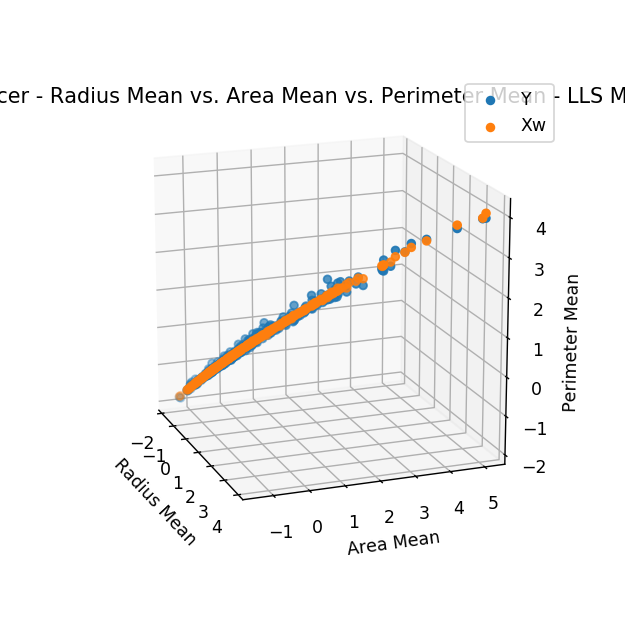

In [19]:
# plot
plot_3d_lls(X_train[:,0], X_train[:, 1], y_train, lls_sol, 
            "Breast Cancer - Radius Mean vs. Area Mean vs. Perimeter Mean - LLS Mini-Batch GD")

### <img src="https://img.icons8.com/dusk/64/000000/1.png" style="height:50px;display:inline"> LASSO Regression
---
* *LASSO (Least Absolute Shrinkage and Selection Operator) Regression* is just like Ridge, but instead of $l_2$, it uses $l_1$ norm of the weight vector.
* * **LASSO Regression Cost Function**: $$ J(\theta) = MSE(\theta) +\lambda \sum_i|\theta_i| $$
* **In Vector Form**: $$ J(\theta) = ||X \theta - y ||_2^2 +\lambda ||\theta ||_1 $$

* The LASSO cost function is **not differentiable** at $\theta_i=0$, but Gradient Descent still works if we use the *sub-gradient vector*: $$ g(\theta,J) = \nabla_{\theta} MSE(\theta) + \lambda \begin{bmatrix}
  sign(\theta_1) \\
  \vdots \\
  sign(\theta_n)
 \end{bmatrix}, sign(\theta_i)= \begin{cases}
    -1       & \quad \text{if } \theta_i < 0 \\
    0       & \quad \text{if } \theta_i = 0 \\
    +1  & \quad \text{if } \theta_i > 0 
  \end{cases}$$ 

* LASSO Regression tends to **eliminate the weights of the least important features** (i.e., set to them zero). It automatically performs **Feature Selection** and outputs a *sparse* model (few non-zero weights).
    * **Ridge** regression will tend to shrink the large weights while hardly shrinking the smaller weights at all. In **LASSO** regression, the shrinkage will be directly proportionate to the importance of the feature in the model.
    * Since $\lambda$ is an arbitrarily selected constant, some feature weights can reach zero, meaning that these features will not be included in the model at all. And that is the built-in feature selection of LASSO regression.
    * In other words, ridge regression will try to find a good model with small-scale features possible while LASSO regression will try to find a model with as few features as possible.
* $l_1$ regularization is much more **robust to outliers**.

In [21]:
# lasso regression
lasso_reg = Lasso(alpha=0.1, fit_intercept=False)
lasso_reg.fit(X_train, y_train)
w = lasso_reg.coef_
lls_sol = X_train @ w.T
print("w:", w)

w: [0.89788547 0.        ]


<IPython.core.display.Javascript object>


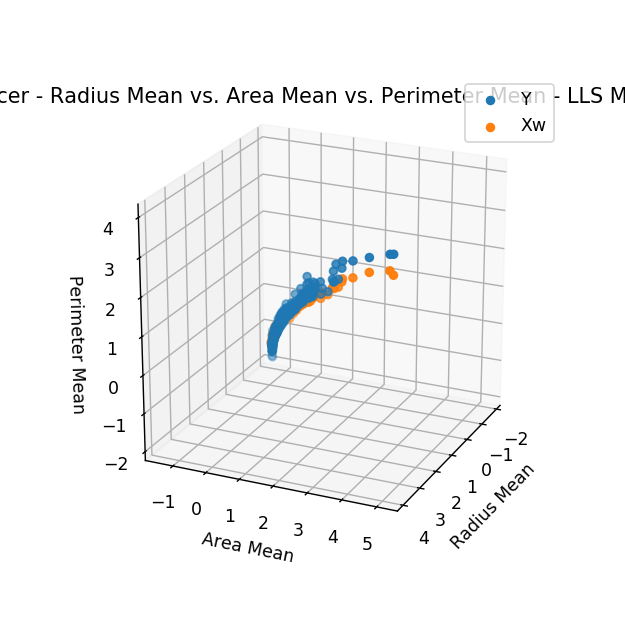

In [22]:
# plot
plot_3d_lls(X_train[:,0], X_train[:, 1], y_train, lls_sol, 
            "Breast Cancer - Radius Mean vs. Area Mean vs. Perimeter Mean - LLS Mini-Batch GD")

<img src="./assets/lass_ridge.jpg" style="height:300px">

* While LASSO is more robust to outliers and performs feature selection, Ridge provides a more balanced minimization of the weights.

### <img src="https://img.icons8.com/dusk/64/000000/plus-2-math.png" style="height:50px;display:inline"> Other Regularizations
---
* **ElasticNet** - a combination between Ridge and Lasso (both $l_1$ and $l_2$ regularizations)
* A more generalized regularizer: $$ \frac{1}{2}\sum_{i=1}^n (\theta^Tx_i - y_i)^2 + \lambda \sum_{j=0}^M |\theta_j|^q$$

<img src="./assets/regularization.jpg" style="height:200px">

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* Supervised vs. Unsupervised Learning - <a href="https://www.youtube.com/watch?v=cfj6yaYE86U">Machine Learning - Supervised VS Unsupervised Learning</a>
* Cross-Validation - <a href="https://www.youtube.com/watch?v=7062skdX05Y">What is Cross Validation and its types?</a>
    * K-Fold Cross Validation - <a href="https://www.youtube.com/watch?v=TIgfjmp-4BA">K-Fold Cross Validation - Intro to Machine Learning</a>
* Linear Regression - <a href="https://www.youtube.com/watch?v=HZ4cvaztQEs">Lecture 3 | Machine Learning (Stanford)</a>
    * <a href="https://www.youtube.com/watch?v=_21o_ylL0q4">Machine Learning Lecture 13 "Linear / Ridge Regression" -Cornell CS4780</a>
* Bias/Variance Trade Off - <a href="https://www.youtube.com/watch?v=SjQyLhQIXSM">Bias/Variance (C2W1L02)</a>
    * <a href="https://www.youtube.com/watch?v=zUJbRO0Wavo">Machine Learning Lecture 19 "Bias Variance Decomposition" -Cornell CS4780</a>
* Feature Scaling - <a href="https://www.youtube.com/watch?v=e1nTgoDI_m8">Gradient descent in practice I: Feature Scaling</a>
* Regularization - <a href="https://www.youtube.com/watch?v=sO4ZirJh9ds">Linear regression (6): Regularization</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/
* Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization, <a href="https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/">Analytics Vidhya</a>
* Examples and code snippets were taken from <a href="http://shop.oreilly.com/product/0636920052289.do">"Hands-On Machine Learning with Scikit-Learn and TensorFlow"</a>